In [9]:
%%HTML
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

## Differentially Private Histogram
---

The following tutorial gives one example of how the `dp_hist()` function is called. The data samples are randomly drawn from a Gaussian distribution. The output of the `dp_hist()` function will be used to populate a bar graph and show the empirical distribution of the data. In addition, a non-private version of the histogram will be shown as a comparison.

The parameters that can be adjusted are:

- Epsilon
- Sample_size


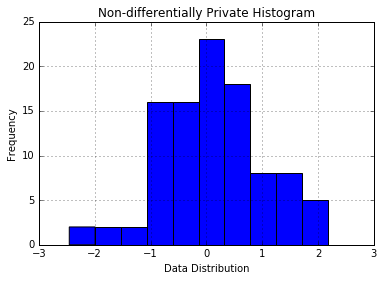

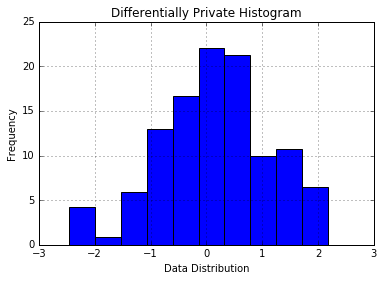

<function __main__.plthist>

In [10]:
%matplotlib inline
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt
import dp_stats as dps

# This tutorial gives an example of one way to use the differentially private histogram function
# A non-differentially private version of the hisotgram will also be displayed for the chosen data set

# This function will allow the output graphs to be interactive
def plthist(Epsilon=1.0, Sample_size = 100):
    # generate a sample data vector
    data_ = np.random.normal(loc = 0, scale = 1.0, size = Sample_size)

    # get the histogram count and bin edges from the differentially private histogram
    # dp_hist ( data, num_bins=10, epsilon=1.0, delta=0.1, histtype = 'continuous' )
    dp_hist_counts, bin_edges = dps.dp_hist(data = data_, num_bins = 10, epsilon = Epsilon, delta = 0.1)

    dp_hist_counts = dp_hist_counts.clip(min = 0)    # number of items in bin can't be negative
    bin_edges_ = bin_edges[:len(dp_hist_counts)]    # grab only the left edge for each bin

    # get the width for each of the bins
    width_ = []
    for i in range(len(bin_edges) - 1):
        app = bin_edges[i + 1] - bin_edges[i]
        width_.append(app)

    # plot the non-differentially private version of the histogram
    plt.hist(data_, bins=10)
    plt.title('Non-differentially Private Histogram')
    plt.xlabel('Data Distribution')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    # plot the differentially private version of the histogram
    plt.bar(bin_edges_, dp_hist_counts, width_)
    plt.title('Differentially Private Histogram')
    plt.xlabel('Data Distribution')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

interact(plthist, Epsilon=(0.1,5.0,0.1), Sample_size=(100,10000,100))

In [11]:
# explain the meaning of adjusting the slide bars

In [12]:
%%HTML
<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Created with Jupyter, delivered by Fastly, rendered by Rackspace.
</footer>